In [1]:
import csv
from random import uniform

import matplotlib.pyplot as plt
from attr import dataclass, astuple

@dataclass
class Vector2i:
    x: int = 0
    y: int = 0


@dataclass
class Color:
    r: float = 0
    g: float = 0
    b: float = 0
    a: float = 1

colors = {}

def draw_rectangle(tl, size, color):
    rectangle = plt.Rectangle((tl.x, tl.y), size.x, size.y, fc=astuple(color))
    plt.gca().add_patch(rectangle)

def read_experiment(seed, name, num):
    with open(f"./traces/seed_{seed}/{name}/experiment_{num}.csv", 'r') as csvfile:
        reader = csv.reader(csvfile)

        plt.figure()
        plt.subplot()

        for line in reader:
            job_id = line[0]
            job_kind = line[1]
            job_time_beg = line[2]
            job_time_end = line[3]
            job_server_id = line[4]

            if job_id != "SYSTEM" and not job_id in colors.keys():
                colors[job_id] = Color(uniform(0.25, 0.9), uniform(0.25, 0.9), uniform(0.25, 0.9), 1)

            tl = Vector2i(int(float(job_time_beg)), int(float(job_server_id)))
            size = Vector2i(int(float(job_time_end)) - int(float(job_time_beg)), 1)

            if job_id == "SYSTEM":
                if job_kind == "JobSystemTurnOff":
                    color = Color(0.2, 0.2, 0.2)
                elif job_kind == "JobSystemTurnOn":
                    color = Color(0.4, 0.4, 0.4)
                else:
                    color = Color(0, 0, 0)
            elif job_kind == "JobReconfiguration":
                color = Color(colors[job_id].r, colors[job_id].g, colors[job_id].b, 0.5)
            else:
                color = colors[job_id]

            draw_rectangle(tl=tl, size=size, color=color)

        plt.ylabel("servers")
        plt.xlabel("time")
        plt.axis("auto")
        plt.show()

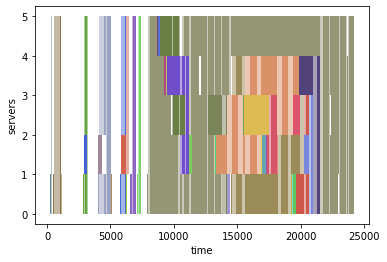

In [2]:
#read_experiment(1, "FIFO", 0)
#read_experiment(1, "PURE", 0)
read_experiment(1,"NEW_GA",0)
# read_experiment(1, "FIFOMAX", 0)
# read_experiment(1, "FIFORECONF", 0)
# read_experiment(1, "FIFORECONFDOWN", 0)
# read_experiment(4, "FIFORECONFUP", 0)
# read_experiment(1, "FIFOREBOOT", 0)
# read_experiment(1, "FIFODVFS", 0)